In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

In [9]:
hd = pd.read_csv('Section6-Homework-Data.csv', encoding='ANSI')

In [11]:
md = pd.read_csv('Movie-Ratings.csv')


In [15]:
md.columns = ['Film', 'Genre', 'RtRatings', 'AuRatings', 'BudgetMillions', 'ReleaseYear']


In [20]:
md.Genre= md.Genre.astype('category')
md.ReleaseYear= md.ReleaseYear.astype('category')

In [27]:
hd.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [33]:
hd.columns = ['DayOfWeek', 'Director', 'Genre', 'Title', 'ReleaseDt', 'Studio', 'AdjustedGrossMil', 'BudgetMil', 'GrossMil', \
                 'ImdbRating', 'MovieLensRating', 'OverseasMil', 'Overseas%', 'ProfitMil', 'Profit%', 'RuntimeMin', \
                  'UsMil', 'GrossUs%'
                 ]

In [72]:
hd.Director = hd.Director.astype('category')
hd.DayOfWeek = hd.DayOfWeek.astype('category')
hd.Genre = hd.Genre.astype('str')
hd.Studio = hd.Studio.astype('str')

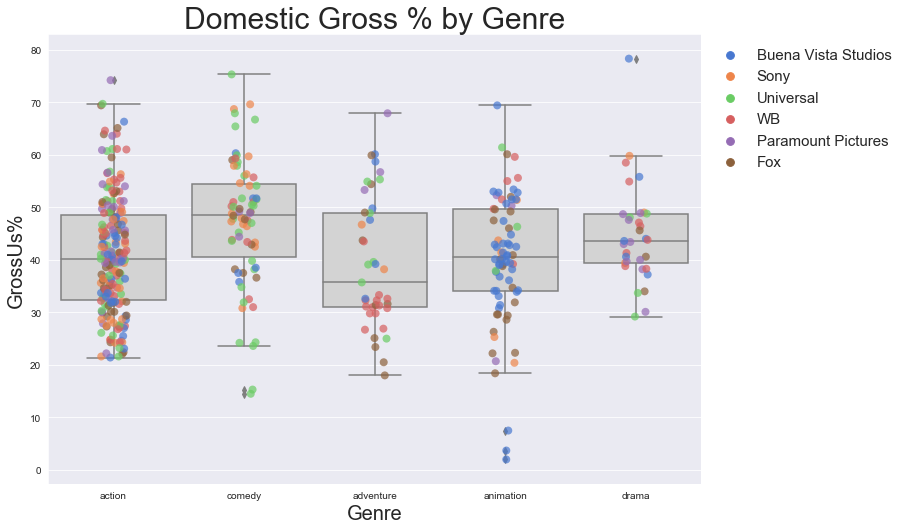

In [123]:
sns.set_style('darkgrid')

f, ax = plt.subplots()
f.set_size_inches(11.7, 8.27)

fil = hd.Genre.isin(['action', 'comedy', 'adventure', 'animation', 'drama'])
fil2 = hd.Studio.isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
plt.title('Domestic Gross % by Genre', fontsize=30)
plt.xlabel('Genre', fontsize=30)
plt.ylabel('Gross % US', fontsize=30)

g = sns.boxplot(data = hd[fil & fil2], x='Genre', y='GrossUs%', color='lightgray')
g2 = sns.stripplot(data = hd[fil & fil2], x='Genre', y='GrossUs%', hue = 'Studio', jitter=True, \
                  size = 8, palette='muted', alpha=0.7)
plt.legend(bbox_to_anchor=(1,1), facecolor='white', frameon=False, prop={'size':15})
#hd[fil & fil2].groupby('Studio').count()